## Common Causes of Death Analysis 
#Justin, Thomas, Karuna, Joseph, Harleen and Grant!

In [1]:
#import dependencies 
import pandas as pd
import hvplot.pandas
import geoviews as gv
import geoviews.tile_sources as gvts
import geopandas as gpd
from pathlib import Path
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt



In [2]:
#paths to csv data
Cause_df = 'Resources/cause_of_deaths.csv'
Aid_df = 'Resources/us_foreign_aid_country.csv'
pop_data_path="Resources/popdata.csv"

#reading csv data and creating dataframes out of it
Cause_df = pd.read_csv(Cause_df)
Aid_df = pd.read_csv(Aid_df)
pop_data_df=pd.read_csv(pop_data_path)
#changing year from int to str for merging
Cause_df['Year'] = Cause_df['Year'].astype(str)
pop_data_df['Year'] =pop_data_df['Year'].astype(str)
#rename columns for merge 
Aid_df = Aid_df.rename(columns = {'Country Code' : 'Code',
                                 'Fiscal Year' : 'Year',
                                 'Country Name' : 'Country/Territory',
                                 'current_amount':'Current Amount of Aid Given by US ($USD)',
                                  'constant_amount':'Constant Amount of Aid Given by US ($USD)',
                                 'Income Group Name':'Country Income Category'})

#obligation only transactoin type
Aid_df=Aid_df.loc[(Aid_df['Transaction Type Name']== 'Obligations')]

#Filtering aid_df
Aid_df=Aid_df[['Year','Country/Territory','Code','Country Income Category','Current Amount of Aid Given by US ($USD)','Constant Amount of Aid Given by US ($USD)']]


#merging
Cause_aid_df = Cause_df.merge(Aid_df, on = ['Code', 'Year', 'Country/Territory'])

Cause_aid_df.head()
cause_aid_pop_df=Cause_aid_df.merge(pop_data_df,on=['Code','Year'])

cause_aid_pop_df.to_csv('Resources/cause_aid_pop.csv')
cause_aid_pop_df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Country Income Category,Current Amount of Aid Given by US ($USD),Constant Amount of Aid Given by US ($USD),Population
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,4154,5945,2673,5005,323,2985,Low Income Country,15222050,30254306,10694796
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,4472,6050,2728,5120,332,3092,Low Income Country,20140068,38650393,10745167
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,5106,6223,2830,5335,360,3325,Low Income Country,31593344,59151797,12057433
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,5681,6445,2943,5568,396,3601,Low Income Country,38124000,69740780,14003760
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,6001,6664,3027,5739,420,3816,Low Income Country,2462000,4407728,15455555


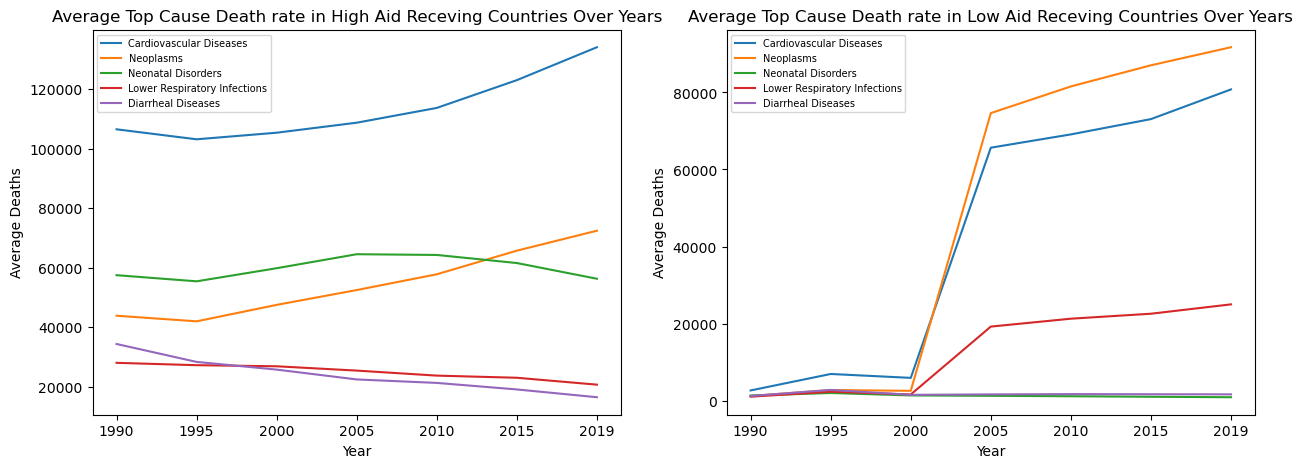

In [3]:
year_df=cause_aid_pop_df.sort_values("Current Amount of Aid Given by US ($USD)",ascending=False)
top_5_countries=['Afghanistan', 'Iraq', 'Israel', 'Poland', 'Pakistan']
top_cause=['Cardiovascular Diseases', 'Neoplasms', 'Neonatal Disorders','Lower Respiratory Infections', 'Diarrheal Diseases']
country_df=year_df.loc[(year_df["Country/Territory"]=='Afghanistan') | (year_df["Country/Territory"]=='Iraq')|(year_df["Country/Territory"]=='Israel')|(year_df["Country/Territory"]=='Poland')|(year_df["Country/Territory"]=='Pakistan')]
us_df=year_df.loc[(year_df["Country/Territory"]=='United States')]
us_df=us_df[["Country/Territory","Year",'Cardiovascular Diseases', 'Neoplasms', 'Neonatal Disorders','Lower Respiratory Infections', 'Diarrheal Diseases']]
us_df=us_df.loc[(us_df["Year"]=='1990') | (us_df["Year"]=='1995') |(us_df["Year"]=='2000') | (us_df["Year"]=='2005') | (us_df["Year"]=='2010') | (us_df["Year"]=='2015')|(us_df["Year"]=='2019')]
us_df=us_df.sort_values("Year")
us_df=(us_df.groupby(["Year"])[['Cardiovascular Diseases', 'Neoplasms', 'Neonatal Disorders','Lower Respiratory Infections', 'Diarrheal Diseases']]).mean()
filter_top_df=country_df[["Country/Territory","Year",'Cardiovascular Diseases', 'Neoplasms', 'Neonatal Disorders','Lower Respiratory Infections', 'Diarrheal Diseases']]
filter_top_df=filter_top_df.loc[(filter_top_df["Year"]=='1990') | (filter_top_df["Year"]=='1995') |(filter_top_df["Year"]=='2000') | (filter_top_df["Year"]=='2005') | (filter_top_df["Year"]=='2010') | (filter_top_df["Year"]=='2015')|(filter_top_df["Year"]=='2019')]
# top_aid_df=(filter_top_df.groupby(["Country/Territory","Year"])[['Cardiovascular Diseases', 'Neoplasms', 'Neonatal Disorders','Lower Respiratory Infections', 'Diarrheal Diseases']]).mean()
top_aid_df=(filter_top_df.groupby("Year")[['Cardiovascular Diseases', 'Neoplasms', 'Neonatal Disorders','Lower Respiratory Infections', 'Diarrheal Diseases']]).mean()

year_df1=cause_aid_pop_df.sort_values("Current Amount of Aid Given by US ($USD)")
bottom_5_countries=['Nicaragua', 'Japan', 'Eritrea', 'Armenia', 'Cyprus']
bcountry_df=year_df.loc[(year_df1["Country/Territory"]=='Nicaragua') | (year_df["Country/Territory"]=='Japan')|(year_df["Country/Territory"]=='Eritrea')|(year_df["Country/Territory"]=='Armenia')|(year_df["Country/Territory"]=='Cyprus')]
filter_bottom_df=bcountry_df[["Country/Territory","Year",'Cardiovascular Diseases', 'Neoplasms', 'Neonatal Disorders','Lower Respiratory Infections', 'Diarrheal Diseases']]
filter_bottom_df=filter_bottom_df.loc[(filter_bottom_df["Year"]=='1990') | (filter_bottom_df["Year"]=='1995') |(filter_bottom_df["Year"]=='2000') | (filter_bottom_df["Year"]=='2005') | (filter_bottom_df["Year"]=='2010') | (filter_bottom_df["Year"]=='2015')|(filter_bottom_df["Year"]=='2019')]
# bottom_aid_df=(filter_bottom_df.groupby(["Country/Territory","Year"])[['Cardiovascular Diseases', 'Neoplasms', 'Neonatal Disorders','Lower Respiratory Infections', 'Diarrheal Diseases']]).mean()
bottom_aid_df=(filter_bottom_df.groupby("Year")[['Cardiovascular Diseases', 'Neoplasms', 'Neonatal Disorders','Lower Respiratory Infections', 'Diarrheal Diseases']]).mean()

plt.figure(figsize=(15,4))
ax = plt.subplot(121)
top_aid_df.plot(ax=ax,title="Average Top Cause Death rate in High Aid Receving Countries Over Years",ylabel="Average Deaths",figsize=(15,5)).legend(fontsize=7, loc="upper left")
ax = plt.subplot(122)
bottom_aid_df.plot(ax=ax,title="Average Top Cause Death rate in Low Aid Receving Countries Over Years",ylabel="Average Deaths",figsize=(15,5)).legend(fontsize=7, loc="upper left")
plt.show()

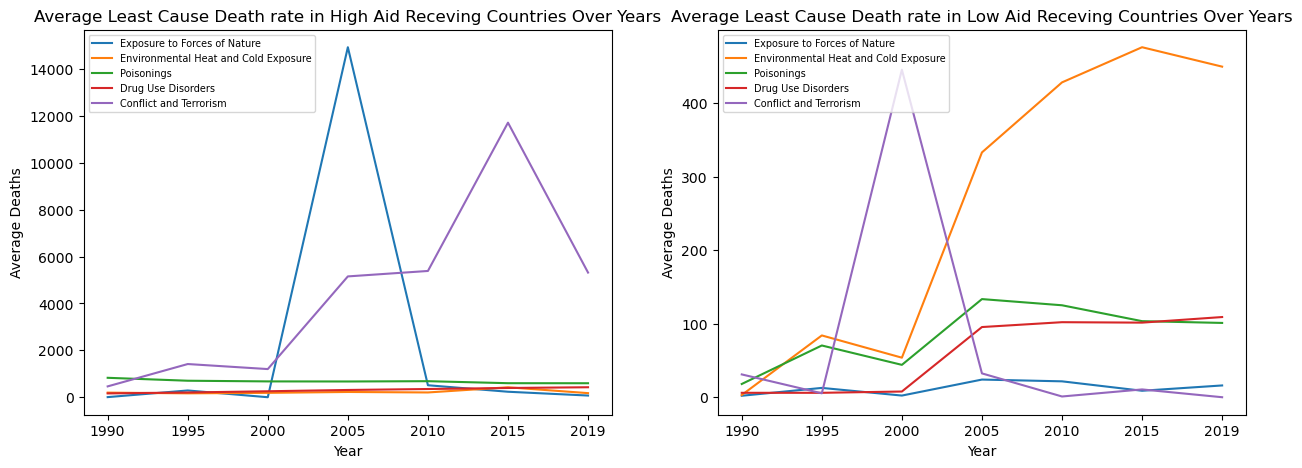

In [4]:
year_df=cause_aid_pop_df.sort_values("Current Amount of Aid Given by US ($USD)",ascending=False)
top_5_countries=['Afghanistan', 'Iraq', 'Israel', 'Poland', 'Pakistan']
bottom_cause=['Exposure to Forces of Nature', 'Environmental Heat and Cold Exposure','Poisonings', 'Drug Use Disorders', 'Conflict and Terrorism']
country_df=year_df.loc[(year_df["Country/Territory"]=='Afghanistan') | (year_df["Country/Territory"]=='Iraq')|(year_df["Country/Territory"]=='Israel')|(year_df["Country/Territory"]=='Poland')|(year_df["Country/Territory"]=='Pakistan')]
us_df=year_df.loc[(year_df["Country/Territory"]=='United States')]
us_df=us_df[["Country/Territory","Year",'Exposure to Forces of Nature', 'Environmental Heat and Cold Exposure','Poisonings', 'Drug Use Disorders', 'Conflict and Terrorism']]
us_df=us_df.loc[(us_df["Year"]=='1990') | (us_df["Year"]=='1995') |(us_df["Year"]=='2000') | (us_df["Year"]=='2005') | (us_df["Year"]=='2010') | (us_df["Year"]=='2015')|(us_df["Year"]=='2019')]
us_df=us_df.sort_values("Year")
us_df=(us_df.groupby(["Year"])[['Exposure to Forces of Nature', 'Environmental Heat and Cold Exposure','Poisonings', 'Drug Use Disorders', 'Conflict and Terrorism']]).mean()
filter_top_df=country_df[["Country/Territory","Year",'Exposure to Forces of Nature', 'Environmental Heat and Cold Exposure','Poisonings', 'Drug Use Disorders', 'Conflict and Terrorism']]
filter_top_df=filter_top_df.loc[(filter_top_df["Year"]=='1990') | (filter_top_df["Year"]=='1995') |(filter_top_df["Year"]=='2000') | (filter_top_df["Year"]=='2005') | (filter_top_df["Year"]=='2010') | (filter_top_df["Year"]=='2015')|(filter_top_df["Year"]=='2019')]
top_aid_df=(filter_top_df.groupby("Year")[['Exposure to Forces of Nature', 'Environmental Heat and Cold Exposure','Poisonings', 'Drug Use Disorders', 'Conflict and Terrorism']]).mean()

year_df1=cause_aid_pop_df.sort_values("Current Amount of Aid Given by US ($USD)")
bottom_5_countries=['Nicaragua', 'Japan', 'Eritrea', 'Armenia', 'Cyprus']
bcountry_df=year_df.loc[(year_df1["Country/Territory"]=='Nicaragua') | (year_df["Country/Territory"]=='Japan')|(year_df["Country/Territory"]=='Eritrea')|(year_df["Country/Territory"]=='Armenia')|(year_df["Country/Territory"]=='Cyprus')]
filter_bottom_df=bcountry_df[["Country/Territory","Year",'Exposure to Forces of Nature', 'Environmental Heat and Cold Exposure','Poisonings', 'Drug Use Disorders', 'Conflict and Terrorism']]
filter_bottom_df=filter_bottom_df.loc[(filter_bottom_df["Year"]=='1990') | (filter_bottom_df["Year"]=='1995') |(filter_bottom_df["Year"]=='2000') | (filter_bottom_df["Year"]=='2005') | (filter_bottom_df["Year"]=='2010') | (filter_bottom_df["Year"]=='2015')|(filter_bottom_df["Year"]=='2019')]
bottom_aid_df=(filter_bottom_df.groupby("Year")[['Exposure to Forces of Nature', 'Environmental Heat and Cold Exposure','Poisonings', 'Drug Use Disorders', 'Conflict and Terrorism']]).mean()

plt.figure(figsize=(15,4))
ax = plt.subplot(121)
top_aid_df.plot(ax=ax,title="Average Least Cause Death rate in High Aid Receving Countries Over Years",ylabel="Average Deaths",figsize=(15,5)).legend(fontsize=7, loc="upper left")
ax = plt.subplot(122)
bottom_aid_df.plot(ax=ax,title="Average Least Cause Death rate in Low Aid Receving Countries Over Years",ylabel="Average Deaths",figsize=(15,5)).legend(fontsize=7, loc="upper left")
plt.show()


In [5]:
Cause_aid_pct_df=Cause_aid_df.copy()
causes=['Meningitis',
       "Alzheimer's Disease and Other Dementias", "Parkinson's Disease",
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis']
total_deaths=Cause_aid_pct_df[causes].sum(axis=1)
Cause_aid_pct_df[causes]=Cause_aid_pct_df[causes].apply(lambda x:(x/total_deaths))
income_death_pct_df=Cause_aid_pct_df.groupby('Country Income Category')[causes].mean().T
high_income_deaths=income_death_pct_df.sort_values('High Income Country', ascending=False)
low_income_deaths=income_death_pct_df.sort_values('Low Income Country', ascending=False)

In [6]:
display(income_death_pct_df.sort_values('High Income Country', ascending=False).head())
display(income_death_pct_df.sort_values('Low Income Country', ascending=False).head())

Country Income Category,High Income Country,Low Income Country,Lower Middle Income Country,Upper Middle Income Country
Cardiovascular Diseases,0.385044,0.141208,0.249122,0.366758
Neoplasms,0.248162,0.052960,0.089141,0.155002
Digestive Diseases,0.045092,0.034715,0.050730,0.045333
Chronic Respiratory Diseases,0.043947,0.027277,0.043115,0.041562
Lower Respiratory Infections,0.040784,0.104506,0.081044,0.048855


Country Income Category,High Income Country,Low Income Country,Lower Middle Income Country,Upper Middle Income Country
Cardiovascular Diseases,0.385044,0.141208,0.249122,0.366758
Neonatal Disorders,0.010409,0.106372,0.078531,0.042043
Diarrheal Diseases,0.002935,0.105072,0.061632,0.014881
Lower Respiratory Infections,0.040784,0.104506,0.081044,0.048855
Malaria,0.000040,0.081922,0.030450,0.005393


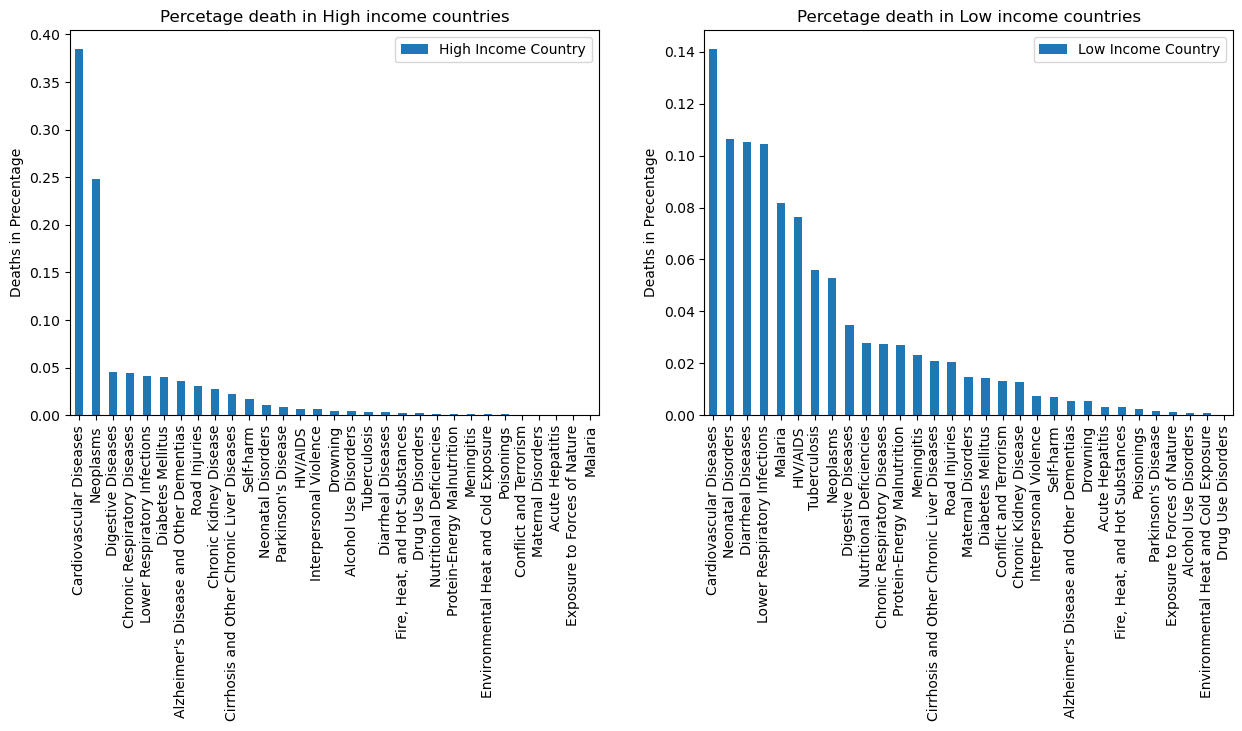

In [7]:
plt.figure(figsize=(15,4))
ax = plt.subplot(121)
high_income_deaths.plot.bar(ax=ax,y="High Income Country",title="Percetage death in High income countries",ylabel="Deaths in Precentage",figsize=(15,5)).legend(fontsize=10, loc="upper right")
ax = plt.subplot(122)
low_income_deaths.plot.bar(ax=ax,y="Low Income Country",title="Percetage death in Low income countries",ylabel="Deaths in Precentage",figsize=(15,5)).legend(fontsize=10, loc="upper right")
plt.show()

In [8]:

# Questions to Answer:
# What are the most common causes of death internationally? - look at least common causes too, just to see if we can make any inferences from that. 
# Death totals(most / least common) - normalize it to the population
# Line plot for time vs cause of death amount in certain # of nations
# Look at the US vs other places specifically, too.
# Compare the US to other countries
# Histogram to scale most prevalent causes of death 
# Box plot looking at variance 



In [9]:

# Where are those most common causes occurring (maybe just look at a few?)
# Geoapify graph?
# Most comm
#  Bar plot, 

In [10]:
 
# How does a certain disease/cause of death trend year over year?
# Line graph
# Scatter plot for various correlations regarding C.O.D. by year, decade, in x# of nations.. 

In [11]:
#What outside events may have influenced those causes of death?
# Availability of aid?
# Medical resources
# Water-related illness
# Geoapify map (malaria is easy to show geographical differences)
# Geoapify map for the amount of aid provided to the nations with the unique causes of death that may have been mitigated by aid 

In [12]:
# Is there any correlation between causes of death in a given area? Why?
#  Scatter plot for causes of death to each other by place, year ext.
    